In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

plt.rcParams["patch.force_edgecolor"] = True


<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

In [3]:
train= pd.read_csv('titanic_train.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

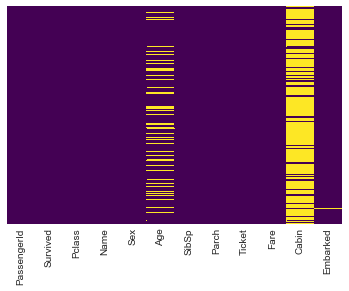

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

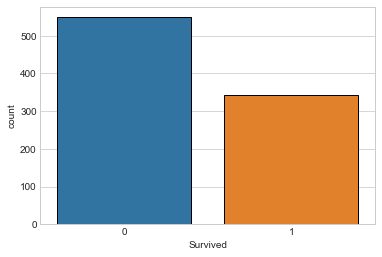

In [20]:
sns.countplot(x='Survived', data=train)

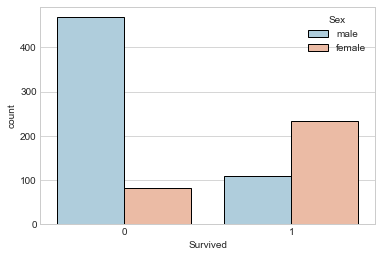

In [24]:
sns.countplot(x='Survived', data=train, hue= 'Sex', palette='RdBu_r')

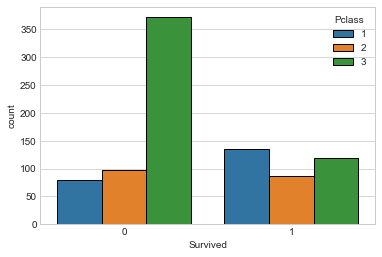

In [26]:
sns.countplot(x='Survived', data=train, hue= 'Pclass')

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


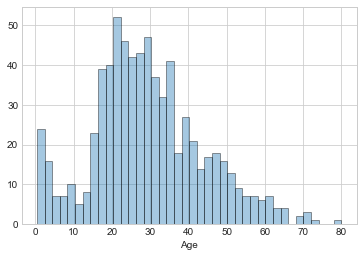

In [31]:
sns.distplot(train['Age'].dropna(),kde=False, bins=40 )

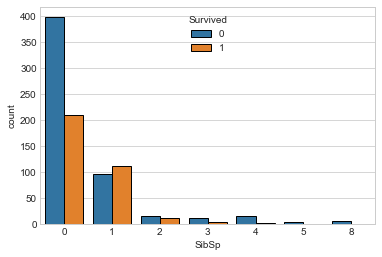

In [34]:
sns.countplot(x='SibSp', data=train, hue='Survived')

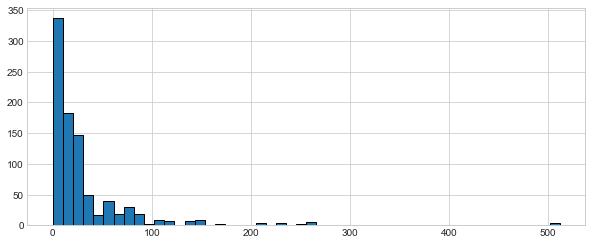

In [42]:
train['Fare'].hist(bins=50, figsize=(10,4))

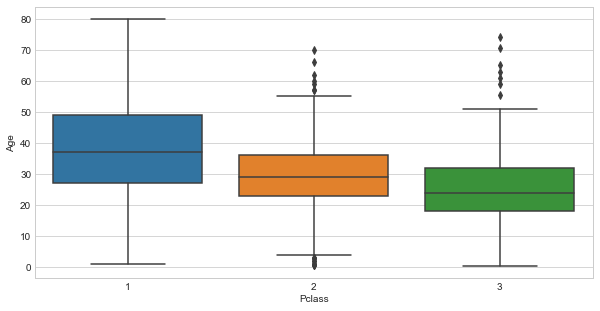

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=train)

In [45]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [48]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis=1)

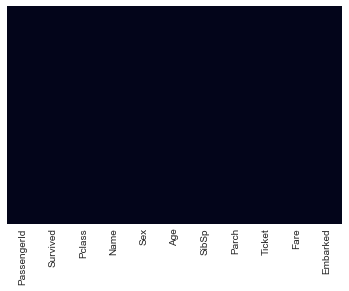

In [65]:
#train['Age'].isnull().value_counts()
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [58]:
train.drop('Cabin', axis=1, inplace=True)

In [63]:
train.dropna(axis=0,how='any', inplace=True)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [68]:
sex=pd.get_dummies(train['Sex'], drop_first=True)

In [72]:
embarked=pd.get_dummies(train['Embarked'], drop_first=True)


In [73]:
train = pd.concat([train, sex, embarked], axis=1)

In [74]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.25,S,1,0,1


In [75]:
train.drop(['Name','Sex','Embarked','Ticket'], axis=1, inplace=True)

In [78]:
train.drop('PassengerId', axis=1, inplace=True)

In [79]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24,1,0,7.2500,1,0,1
1,1,1,37,1,0,71.2833,0,0,0
2,1,3,24,0,0,7.9250,0,0,1
3,1,1,37,1,0,53.1000,0,0,1
4,0,3,24,0,0,8.0500,1,0,1


In [100]:
#train.drop('Survived', axis=1)
X= train.iloc[:,1:] 
y= train['Survived']

In [102]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
log_model = LogisticRegression()

In [107]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
y_pred = log_model.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86       163
          1       0.84      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [121]:
#(confusion_matrix(y_test, y_pred)[0,0]+confusion_matrix(y_test, y_pred)[1,1])/(confusion_matrix(y_test, y_pred)[0,0]+confusion_matrix(y_test, y_pred)[0,1]+confusion_matrix(y_test, y_pred)[1,1]+confusion_matrix(y_test, y_pred)[1,0])
print(confusion_matrix(y_test, y_pred))


[[150  13]
 [ 36  68]]
